# Cryptocurrency Backtesting Example
This notebook demonstrates how to use the backtesting framework with market data.

In [1]:
import sys
sys.path.append('..')

from backtesting_framework.main import BacktestingEngine
from backtesting_framework.strategies.base import Strategy
import pandas as pd
import matplotlib.pyplot as plt

## 1. Create a Simple Strategy
Let's create a simple moving average crossover strategy as an example.

In [2]:
class MovingAverageCrossoverStrategy(Strategy):
    def __init__(self, short_window=20, long_window=50):
        self.short_window = short_window
        self.long_window = long_window
    
    def generate_signals(self, data):
        # Calculate moving averages
        data['SMA_short'] = data['price_usd_close'].rolling(window=self.short_window).mean()
        data['SMA_long'] = data['price_usd_close'].rolling(window=self.long_window).mean()
        
        # Generate signals (1 for buy, -1 for sell, 0 for hold)
        data['signal'] = 0
        data.loc[data['SMA_short'] > data['SMA_long'], 'signal'] = 1
        data.loc[data['SMA_short'] < data['SMA_long'], 'signal'] = -1
        
        return data
    
    def calculate_position_size(self, data, capital):
        # Calculate how many units we can buy/sell based on capital and current price
        price = data['price_usd_close'].iloc[0]
        quantity = capital / price  # Calculate actual quantity based on price
        
        return pd.DataFrame({
            'position': [quantity * data['signal'].iloc[0]]  # Multiply quantity by signal
        })

## 2. Initialize and Run Backtest

In [3]:
# Initialize the backtesting engine
data_path = 'data/market_data'
engine = BacktestingEngine(data_path=data_path, initial_capital=100000)

# Create strategy instance
strategy = MovingAverageCrossoverStrategy(short_window=20, long_window=50)

# Run backtest
results = engine.run_backtest(
    strategy=strategy,
    start_timestamp=1577836800000,  # 2020-01-01 in Unix milliseconds
    end_timestamp=1704067199000     # 2023-12-31 in Unix milliseconds
)


Market Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 4996 entries, 1430697600000 to 1743984000000
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_x               4996 non-null   object 
 1   price_usd_adj_close  4996 non-null   float64
 2   price_usd_close      4996 non-null   float64
 3   price_usd_high       4996 non-null   float64
 4   price_usd_low        4996 non-null   float64
 5   price_usd_open       4996 non-null   float64
 6   date_y               4996 non-null   object 
 7   volume               4996 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 351.3+ KB
None

Market Data Description:
       price_usd_adj_close  price_usd_close  price_usd_high  price_usd_low  \
count          4996.000000      4996.000000     4996.000000    4996.000000   
mean             19.337933        99.736053      103.989595      95.247312   
std              19.784400    

c:\Users\adam arbain\ichiboss-\backtesting_framework\data\preprocessor.py:73: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features[col].fillna(features[col].mean(), inplace=True)


Calculated Position Size: 0.0
Order Type: buy
Order Quantity: 0.0
Order Price: $10.88
Updated Capital: $0.00

Timestamp: 1592179200000
Signal: 1
Current Capital: $0.00
Calculated Position Size: 0.0
Order Type: buy
Order Quantity: 0.0
Order Price: $10.89
Updated Capital: $0.00

Timestamp: 1592265600000
Signal: 1
Current Capital: $0.00
Calculated Position Size: 0.0
Order Type: buy
Order Quantity: 0.0
Order Price: $10.90
Updated Capital: $0.00

Timestamp: 1592352000000
Signal: 1
Current Capital: $0.00
Calculated Position Size: 0.0
Order Type: buy
Order Quantity: 0.0
Order Price: $10.70
Updated Capital: $0.00

Timestamp: 1592438400000
Signal: 1
Current Capital: $0.00
Calculated Position Size: 0.0
Order Type: buy
Order Quantity: 0.0
Order Price: $10.58
Updated Capital: $0.00

Timestamp: 1592524800000
Signal: 1
Current Capital: $0.00
Calculated Position Size: 0.0
Order Type: buy
Order Quantity: 0.0
Order Price: $10.31
Updated Capital: $0.00

Timestamp: 1592784000000
Signal: 1
Current Capital

## 3. Analyze Results

Performance Metrics:
{'total_return': np.float64(0.0), 'sharpe_ratio': np.float64(-409445970315765.94), 'max_drawdown': 0.0, 'win_rate': 0.0, 'total_trades': 957, 'avg_trade_return': np.float64(104.4932079414838)}

Detailed Report:

Performance Report
-----------------
Initial Capital: $100,000.00
Total Return: 0.00%
Sharpe Ratio: -409445970315765.94
Max Drawdown: 0.00%
Win Rate: 0.00%
Total Trades: 957
Average Trade Return: $104.49


Trade History:
                     timestamp symbol  type     quantity   price     value
0   2025-04-12 02:07:42.847087    BTC   buy  15822.78481   6.320  100000.0
1   2025-04-12 02:07:42.850342    BTC  sell      0.00000   5.539       0.0
2   2025-04-12 02:07:42.852302    BTC  sell      0.00000   6.100       0.0
3   2025-04-12 02:07:42.853479    BTC  sell      0.00000   6.010       0.0
4   2025-04-12 02:07:42.857306    BTC  sell      0.00000   7.200       0.0
..                         ...    ...   ...          ...     ...       ...
952 2025-04-12 02:07:

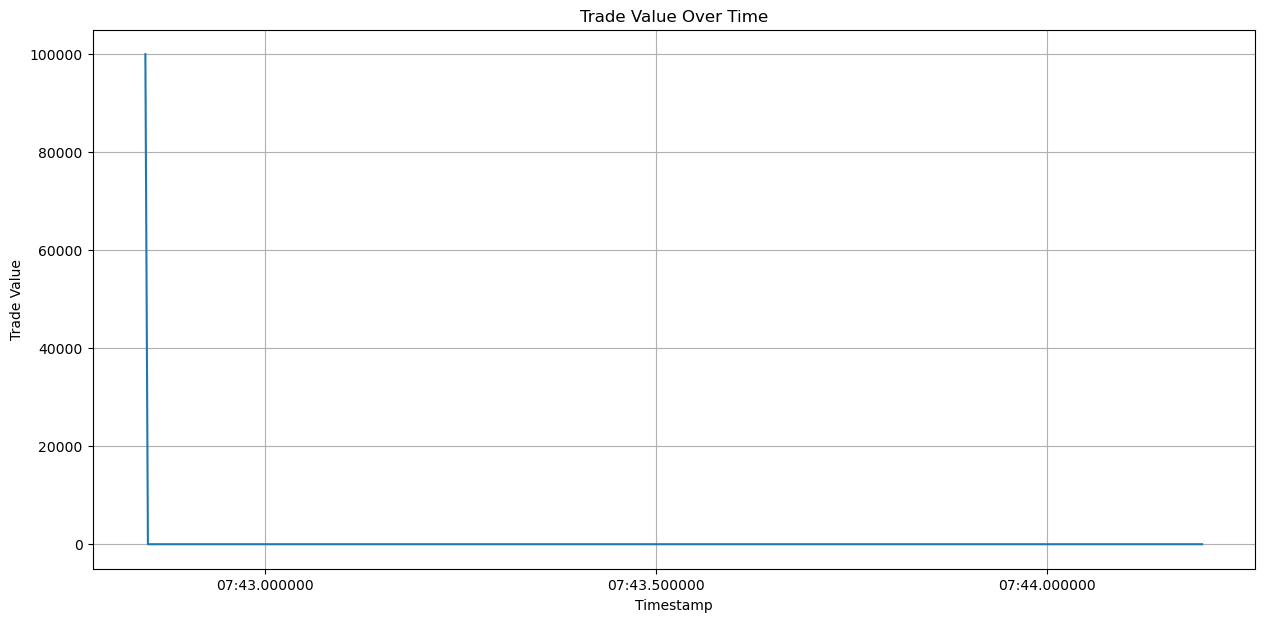

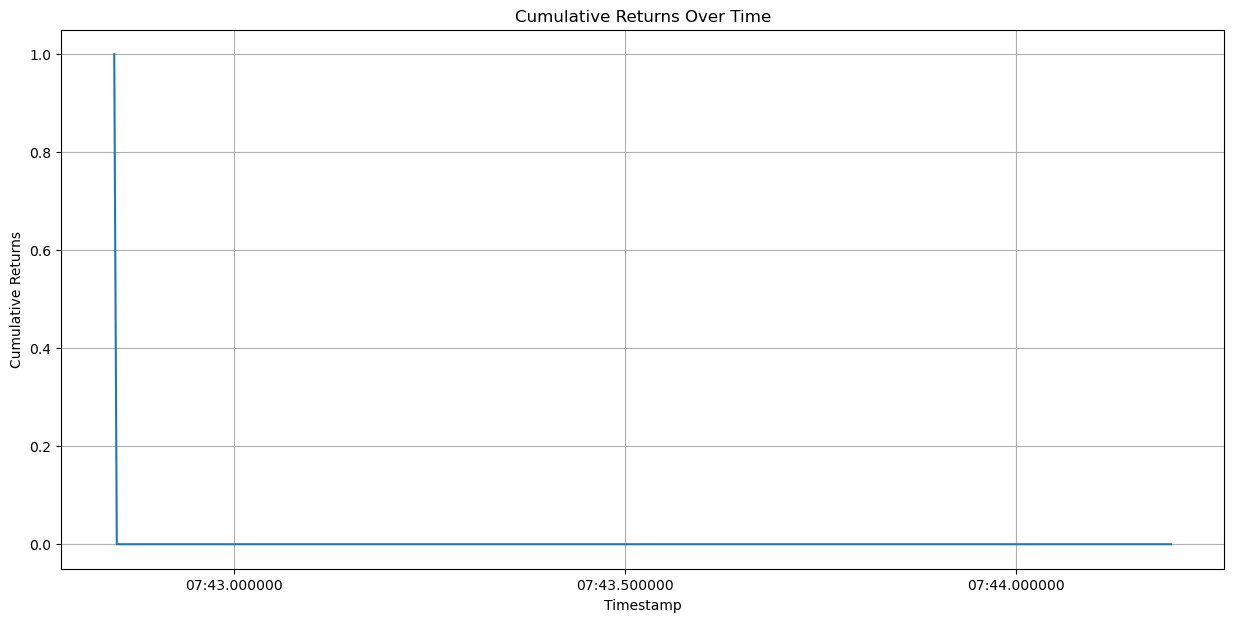

In [4]:
# Display performance metrics
print("Performance Metrics:")
print(results['metrics'])

# Display detailed report
print("\nDetailed Report:")
print(results['report'])

# Plot trade history
trade_history = results['trade_history']
print("\nTrade History:")
print(trade_history)
plt.figure(figsize=(15, 7))
plt.plot(trade_history['timestamp'], trade_history['value'])
plt.title('Trade Value Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Trade Value')
plt.grid(True)
plt.show()

# convert trade history timestamps to datetime for better plotting
trade_history['timestamp'] = pd.to_datetime(trade_history['timestamp'], unit='ms')

# convert trade history values to csv for further analysis
trade_history.to_csv('trade_history.csv', index=False)

# Calculate cumulative returns
trade_history['cumulative_returns'] = (trade_history['value'] / trade_history['value'].iloc[0]).fillna(0)

plt.figure(figsize=(15, 7))
plt.plot(trade_history['timestamp'], trade_history['cumulative_returns'])
plt.title('Cumulative Returns Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.show()